In [112]:
# Observations 
# There is a relationship between latitude and max temperature.  
# There does not appear to be a relationship between humidity, cloudiness or wind speed and latitude.
# Cloudiness is evenly dispersed across latitudes. 
# Humidity was above 40% for most latitudes whenthis data was pulled.  

In [113]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
#from api_keys import api_key
units = "imperial"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
#query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

In [114]:
# Weather api key
api_key = "792772f3f394157e2aafbdb54206acfb"

In [115]:
# base url
url = "http://api.openweathermap.org/data/2.5/weather?"

In [116]:
#query url
query_url = f"{url}appid={api_key}&units={units}&q="

In [117]:
# Determine cities based on random latituse and longitude
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

610

In [118]:
# Establish the get request for the required data
# set lists for the dataframe
city_two = []
country = []
id = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind = []
datetime = []

# set initial count quantities 
count_one = 0
set_one = 1

# loops for creating dataframe columns, break into requests of 50 at a time with a 10 second lag
for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        id.append(response['id'])
        country.append(response['sys']['country'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        datetime.append(response['dt'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
            time.sleep(5)
        else:
            count_one += 1
            city_two.append(city)
          
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("Missing field/result... skipping")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | kirakira
Processing Record 2 of Set 1 | rikitea
Missing field/result... skipping
Processing Record 3 of Set 1 | chokurdakh
Processing Record 4 of Set 1 | fort saint john
Processing Record 5 of Set 1 | punta arenas
Processing Record 6 of Set 1 | dunedin
Processing Record 7 of Set 1 | myski
Processing Record 8 of Set 1 | bouza
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | agucadoura
Processing Record 11 of Set 1 | khatanga
Missing field/result... skipping
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | lasa
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | moshenskoye
Processing Record 19 of Set 1 | puerto ayora
Missing field/result... skipping
Processing Record 20 of Set 1 | stephenville
Processing Record 21 of Set 1 | tubuala
Processing Record 22 of Set 1 |

Processing Record 33 of Set 4 | lebu
Processing Record 34 of Set 4 | hobyo
Processing Record 35 of Set 4 | usinsk
Processing Record 36 of Set 4 | palmer
Processing Record 37 of Set 4 | cherskiy
Processing Record 38 of Set 4 | potsdam
Processing Record 39 of Set 4 | ofaqim
Processing Record 40 of Set 4 | belmonte
Processing Record 41 of Set 4 | fairlie
Processing Record 42 of Set 4 | coquimbo
Processing Record 43 of Set 4 | ossora
Processing Record 44 of Set 4 | abeche
Processing Record 45 of Set 4 | airai
Processing Record 46 of Set 4 | smithers
Processing Record 47 of Set 4 | killybegs
Processing Record 48 of Set 4 | sechura
Processing Record 49 of Set 4 | verkhoyansk
Processing Record 1 of Set 5 | mwene-ditu
Missing field/result... skipping
Processing Record 2 of Set 5 | esmeraldas
Processing Record 3 of Set 5 | houma
Processing Record 4 of Set 5 | point pedro
Processing Record 5 of Set 5 | tignere
Processing Record 6 of Set 5 | mecca
Processing Record 7 of Set 5 | daru
Processing Re

Processing Record 21 of Set 8 | kemijarvi
Processing Record 22 of Set 8 | olinda
Processing Record 23 of Set 8 | hasaki
Processing Record 24 of Set 8 | buin
Missing field/result... skipping
Processing Record 25 of Set 8 | kilindoni
Processing Record 26 of Set 8 | bonfim
Processing Record 27 of Set 8 | san patricio
Processing Record 28 of Set 8 | magdagachi
Processing Record 29 of Set 8 | kamina
Processing Record 30 of Set 8 | cascais
Processing Record 31 of Set 8 | upata
Processing Record 32 of Set 8 | tumut
Processing Record 33 of Set 8 | moussoro
Missing field/result... skipping
Processing Record 34 of Set 8 | bogande
Processing Record 35 of Set 8 | hays
Processing Record 36 of Set 8 | calabozo
Processing Record 37 of Set 8 | zyryanka
Processing Record 38 of Set 8 | saint-augustin
Processing Record 39 of Set 8 | malanje
Processing Record 40 of Set 8 | isangel
Processing Record 41 of Set 8 | green river
Processing Record 42 of Set 8 | teya
Processing Record 43 of Set 8 | bolobo
Proces

In [119]:
# create a data frame from cities, lat, and temp
weather_dict = {
    "id": id,
    "city": city_two,
    "country": country,
    "lat": lat,
    "lng": lng,
    "max_temp": max_temp,
    "humidity": humidity,
    "cloudiness": cloudiness,
    "wind": wind,
    "datetime": datetime}


In [120]:
# check counts
print(len(id), len(city_two), len(lat),len(max_temp), len(humidity), len(cloudiness), len(wind))

535 535 535 535 535 535 535


In [121]:
# Establish the dataframe
weather_data = pd.DataFrame(weather_dict)
weather_data

,id,city,country,lat,lng,max_temp,humidity,cloudiness,wind,datetime
0,2178753,kirakira,SB,-10.45,161.92,83.32,74,20,8.77,1600909636
1,4030556,rikitea,PF,-23.12,-134.97,72.61,74,15,10.65,1600909636
2,2126123,chokurdakh,RU,70.63,147.92,41.97,79,100,5.59,1600909636
3,2755862,fort saint john,NL,52.65,6.39,59.00,92,100,4.00,1600909636
4,1692429,punta arenas,PH,8.99,125.34,84.45,71,40,1.81,1600909636
...,...,...,...,...,...,...,...,...,...,...
530,1516589,zhezkazgan,KZ,47.80,67.71,48.61,71,0,9.19,1600909753
531,1547449,rodrigues alves,MU,-19.70,63.42,68.25,76,0,12.82,1600909753
532,506763,polyarnyy,RU,69.20,33.45,50.00,76,75,6.71,1600909753
533,5287262,buckeye,US,33.37,-112.58,102.20,12,1,8.05,1600909753


In [122]:
weather_data.shape

(535, 10)

In [123]:
#Save dataframe
weather_data.to_csv("../../Resources/WeatherData.csv", index=False, header=True)

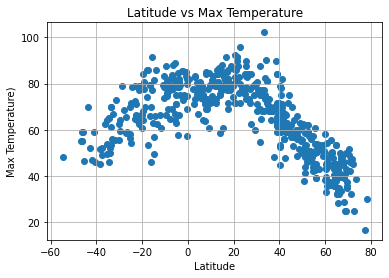

In [124]:
# Build a scatter plot for Max Temp
plt.scatter(weather_data["lat"], weather_data["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Max Temperature")
plt.ylabel("Max Temperature)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Temperature_Latitude.png")

# Show plot
plt.show()

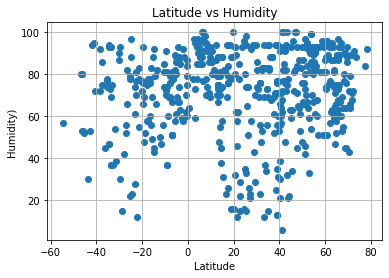

In [125]:
# Build a scatter plot for Humidity
plt.scatter(weather_data["lat"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Humidity")
plt.ylabel("Humidity)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Humidity_Latitude.png")

# Show plot
plt.show()

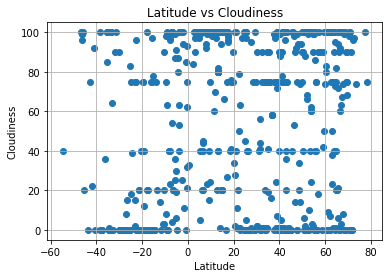

In [126]:
# Build a scatter plot for Cloudiness
plt.scatter(weather_data["lat"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Cloudiness_Latitude.png")

# Show plot
plt.show()

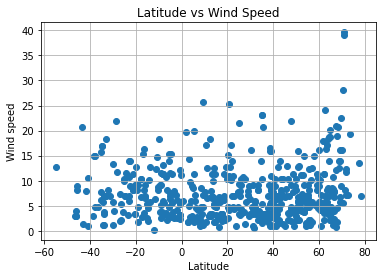

In [127]:
# Build a scatter plot for Windspeed
plt.scatter(weather_data["lat"], weather_data["wind"], marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs Wind Speed")
plt.ylabel("Wind speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Windspeed_Latitude.png")

# Show plot
plt.show()

In [128]:
# Begin Hemisphere designation
# Create the bins in which Data will be held
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bins = [-90, 0, 90]

# Create the names for the five bins
group_names = ["Southern", "Northern"]

In [129]:
# Create new column for hemisphere
weather_data["hemisphere"] = pd.cut(weather_data["lat"], bins, labels=group_names, include_lowest=False)
weather_data

,id,city,country,lat,lng,max_temp,humidity,cloudiness,wind,datetime,hemisphere
0,2178753,kirakira,SB,-10.45,161.92,83.32,74,20,8.77,1600909636,Southern
1,4030556,rikitea,PF,-23.12,-134.97,72.61,74,15,10.65,1600909636,Southern
2,2126123,chokurdakh,RU,70.63,147.92,41.97,79,100,5.59,1600909636,Northern
3,2755862,fort saint john,NL,52.65,6.39,59.00,92,100,4.00,1600909636,Northern
4,1692429,punta arenas,PH,8.99,125.34,84.45,71,40,1.81,1600909636,Northern
...,...,...,...,...,...,...,...,...,...,...,...
530,1516589,zhezkazgan,KZ,47.80,67.71,48.61,71,0,9.19,1600909753,Northern
531,1547449,rodrigues alves,MU,-19.70,63.42,68.25,76,0,12.82,1600909753,Southern
532,506763,polyarnyy,RU,69.20,33.45,50.00,76,75,6.71,1600909753,Northern
533,5287262,buckeye,US,33.37,-112.58,102.20,12,1,8.05,1600909753,Northern


In [130]:
# filter rows for only Southern Hemisphere  - and create new dataframe
weather_data_S = weather_data[weather_data['hemisphere']=='Southern']
print(weather_data_S.shape)


(143, 11)


In [131]:
# filter rows for only Northern Hemisphere  - and create new dataframe
weather_data_N = weather_data[weather_data['hemisphere']=='Northern']
print(weather_data_N.shape)


(392, 11)


In [132]:
from scipy.stats import linregress

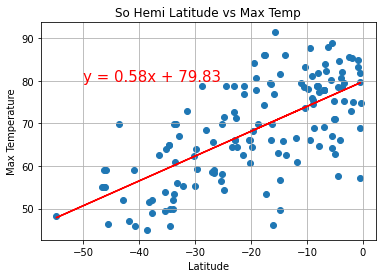

In [133]:
# Add the linear regression equation and line to plot So Hemi Max Temp
lat = weather_data_S['lat']
temp = weather_data_S['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_S['lat'], weather_data_S['max_temp'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_S["lat"], weather_data_S["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("So Hemi Latitude vs Max Temp")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.plot(weather_data_S['lat'],regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("So Hemi Temperature_Latitude.png")

# Show plot
plt.show()

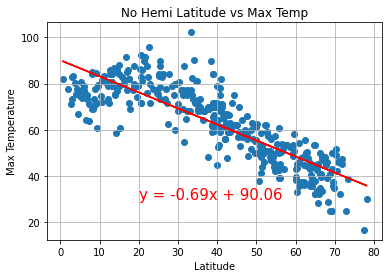

In [134]:
# Add the linear regression equation and line to plot No Hemi Max Temp
lat = weather_data_N['lat']
temp = weather_data_N['max_temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_N['lat'], weather_data_N['max_temp'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_N["lat"], weather_data_N["max_temp"], marker="o")

# Incorporate the other graph properties
plt.title("No Hemi Latitude vs Max Temp")
plt.ylabel("Max Temperature")
plt.xlabel("Latitude")
plt.plot(weather_data_N['lat'],regress_values,"r-")
plt.annotate(line_eq,(20,30),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("No Hemi Temperature_Latitude.png")

# Show plot
plt.show()

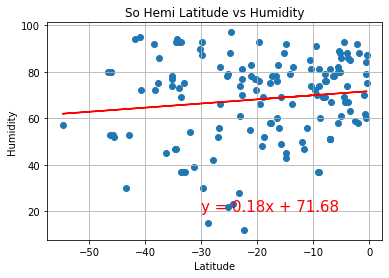

In [135]:
# Add the linear regression equation and line to plot So Hemi Humidity
lat = weather_data_S['lat']
humidity = weather_data_S['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_S['lat'], weather_data_S['humidity'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_S["lat"], weather_data_S["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("So Hemi Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(weather_data_S['lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("So Hemi Humidity_Latitude.png")

# Show plot
plt.show()

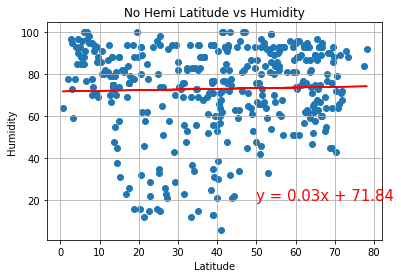

In [136]:
# Add the linear regression equation and line to plot No Hemi Humidity
lat = weather_data_N['lat']
humidity = weather_data_N['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_N['lat'], weather_data_N['humidity'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_N["lat"], weather_data_N["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("No Hemi Latitude vs Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.plot(weather_data_N['lat'],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("No Hemi Humidity_Latitude.png")

# Show plot
plt.show()

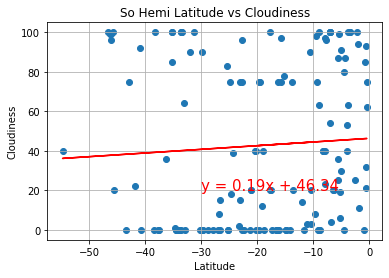

In [137]:
# Add the linear regression equation and line to plot So Hemi Humidity
lat = weather_data_S['lat']
humidity = weather_data_S['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_S['lat'], weather_data_S['cloudiness'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_S["lat"], weather_data_S["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("So Hemi Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(weather_data_S['lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("So Hemi Cloudiness_Latitude.png")

# Show plot
plt.show()

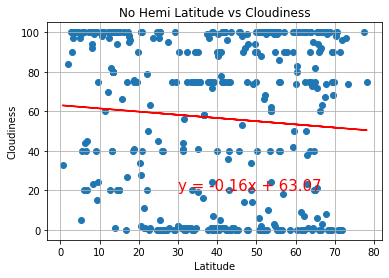

In [138]:
# Add the linear regression equation and line to plot No Hemi Humidity
lat = weather_data_N['lat']
humidity = weather_data_N['cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_N['lat'], weather_data_N['cloudiness'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_N["lat"], weather_data_N["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("No Hemi Latitude vs Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.plot(weather_data_N['lat'],regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("No Hemi Cloudiness_Latitude.png")

# Show plot
plt.show()

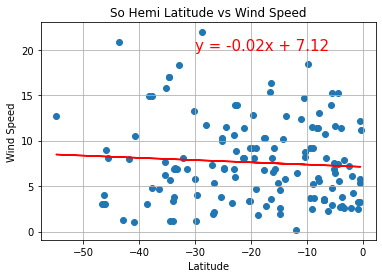

In [139]:
# Add the linear regression equation and line to plot So Hemi Humidity
lat = weather_data_S['lat']
humidity = weather_data_S['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_S['lat'], weather_data_S['wind'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_S["lat"], weather_data_S["wind"], marker="o")

# Incorporate the other graph properties
plt.title("So Hemi Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(weather_data_S['lat'],regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("So Hemi Windspeed_Latitude.png")

# Show plot
plt.show()

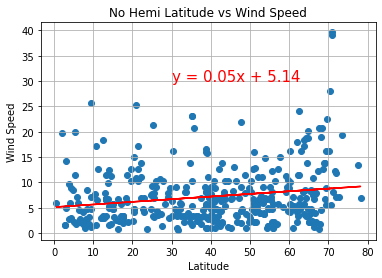

In [140]:
# Add the linear regression equation and line to plot So Hemi Humidity
lat = weather_data_N['lat']
humidity = weather_data_N['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(weather_data_N['lat'], weather_data_N['wind'])
regress_values = lat * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(weather_data_N["lat"], weather_data_N["wind"], marker="o")

# Incorporate the other graph properties
plt.title("No Hemi Latitude vs Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.plot(weather_data_N['lat'],regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.grid(True)

# Save the figure
#plt.savefig("No Hemi Cloudiness_Latitude.png")

# Show plot
plt.show()